# Project 2 : two dimentional Ising model

In [1]:
import pickle
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skms
import sklearn.linear_model as skl
import sklearn.metrics as skm
import tqdm
import copy
import time
from IPython.display import display

%matplotlib inline

sns.set(color_codes=True)

import algorithms

In [2]:
file_dir = os.path.join(os.getcwd(), "files")
filenames = glob.glob(os.path.join(file_dir, 'Ising2D*'))
label_filename = list(filter(lambda x: "label" in x, filenames))[0]
dat_filename = list(filter(lambda x: "label" not in x, filenames))[0]

# Read in the labels
with open(label_filename, "rb") as f:
    labels = pickle.load(f)

# Read in the corresponding configurations
with open(dat_filename, "rb") as f:
    data = np.unpackbits(pickle.load(f)).reshape(-1, 1600).astype("int")

# Set spin-down to -1
data[data == 0] = -1

In [3]:
import pickle
import numpy as np
def read_t(t,root="./files/"):
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
    return np.unpackbits(data).astype(int).reshape(-1,1600)

### Excluding T = 2.0, 2.25, 2.5 because they are the critical phase and we have a binary model.

In [4]:
# Pretty sure we don't need this anymore 
t = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]

ordered = []
disordered = []

for t in t:
    if (t<2.0):
        ordered.append(read_t(t))
    else:
        disordered.append(read_t(t))

In [5]:
# set spin-down to minus one. 
ordered[ordered == 0] = -1
disordered[disordered == 0] = -1

# now the spin has values either plus or minus one.

In [6]:
# Labels for data

In [7]:
cwd = os.getcwd()
filenames = glob.glob(os.path.join(cwd, 'files*'))

In [8]:
# label_filename = list(filter(lambda x: "label" in x, filenames))[0]
# dat_filename = list(filter(lambda x: "label" not in x, filenames))[0]

# Read in the labels
with open(label_filename, "rb") as f:
    labels = pickle.load(f)

# Read in the corresponding configurations
with open(dat_filename, "rb") as f:
    data = np.unpackbits(pickle.load(f)).reshape(-1, 1600).astype("int")

# Set spin-down to -1
data[data == 0] = -1

In [9]:
# Set up slices of the dataset
ordered = slice(0, 70000)
critical = slice(70000, 100000)
disordered = slice(100000, 160000)

X = np.concatenate((data[ordered], data[disordered])),
Y = np.concatenate((labels[ordered], labels[disordered]))

In [10]:
ind = 1
X[0][ind], Y[ind]

(array([1, 1, 1, ..., 1, 1, 1]), 1)

In [11]:
X

(array([[-1, -1, -1, ..., -1, -1, -1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [-1, -1,  1, ...,  1, -1, -1],
        ..., 
        [ 1,  1,  1, ...,  1,  1, -1],
        [ 1,  1,  1, ...,  1, -1, -1],
        [ 1,  1,  1, ...,  1, -1, -1]]),)

In [12]:
# experimental setup:

lmda = [0.001,0.01,0.1,1.0,10.]
eta = [0.001,0.01,0.1]
n_iter = [10,50,100]
key = "sigmoid" # and ELU

In [13]:
from utils import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[0], Y, split_size=0.333333, random_state=None)

In [14]:
eta = 0.01
n_iter = 50
random_state = 1
key = "lasso" 
lmd=0.0001
# (self, eta, random_state, key, n_iter = 50, lmd = 0, tolerance=1e-14):
a = algorithms.LogisticRegression(eta, random_state, key, n_iter, lmd)

In [15]:
log = a.fit(X_train, y_train)

/home/hanna/project2/Costfunctions.py:76: RuntimeWarning: divide by zero encountered in log
  return -y.dot(np.log(self.p)) - ((1 - y).dot(np.log(1 - self.p))) + self.lmd


In [16]:
score = log.predict(X_test)

In [17]:
score

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
acc = np.sum(score == y_test)/len(score)
acc

0.99639963996399639

In [19]:
# new ols 0.99189918991899195

# ridge lmd = 0.01 0.501950195019502
# ridge lmd = 0.001 0.89378937893789379
# ridge lmd = 0.0001 0.99099909990999102

# lasso lmd = 0.1 0.99009900990099009
# lasso lmd = 0.01 0.9924992499249925
# lasso lmd = 0.001 0.99279927992799277
#lasso lmd = 0.0001 0.99279927992799277

# eta = 0.01, lmd = 0.00 0.99579957995799584
# lmd 

In [20]:
accuracy = {"ols": [], "ridge":[], "lasso": []}

In [21]:
eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

for e in eta:
    for l in lmd:
        
        a = algorithms.LogisticRegression(e, random_state, key, n_iter, l)
        log = a.fit(X_train, y_train)
        score = log.predict(X_test)
        acc = np.sum(score == y_test)/len(score)
        accuracy[key].append(acc)

/home/hanna/project2/Costfunctions.py:76: RuntimeWarning: divide by zero encountered in log
  return -y.dot(np.log(self.p)) - ((1 - y).dot(np.log(1 - self.p))) + self.lmd


In [22]:
#accuracy["lasso"]

In [23]:
m = np.array(accuracy["lasso"]).reshape((len(eta), len(lmd)))
m

array([[ 0.77857786,  0.77857786,  0.77857786,  0.77857786,  0.77947795,
         0.77947795],
       [ 0.94179418,  0.94179418,  0.94209421,  0.9429943 ,  0.94329433,
         0.91689169],
       [ 0.99639964,  0.99639964,  0.99639964,  0.99579958,  0.95859586,
         0.89348935],
       [ 0.99789979,  0.99789979,  0.99789979,  0.99669967,  0.96879688,
         0.89378938]])

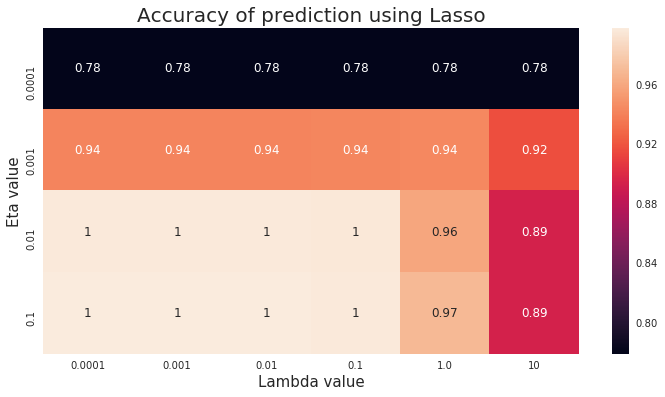

In [24]:
m = np.array(accuracy["lasso"]).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Accuracy of prediction using Lasso", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15)
plt.savefig("./results/figures/Logisticregression_Lasso.png")

# OLS

In [25]:
key = "ols"
etas = [0.0001, 0.001, 0.01, 0.1]

for e in etas:
    a = algorithms.LogisticRegression(e, random_state, key, n_iter)
    log = a.fit(X_train, y_train)
    score = log.predict(X_test)
    acc = np.sum(score == y_test)/len(score)
    accuracy[key].append(acc)

/home/hanna/project2/Costfunctions.py:40: RuntimeWarning: divide by zero encountered in log
  return -y.dot(np.log(self.p)) - ((1 - y).dot(np.log(1 - self.p)))


In [26]:
m = np.array(accuracy[key])
print(m)
np.array(m).reshape((4, 1))

[ 0.77857786  0.94179418  0.99639964  0.99789979]


array([[ 0.77857786],
       [ 0.94179418],
       [ 0.99639964],
       [ 0.99789979]])

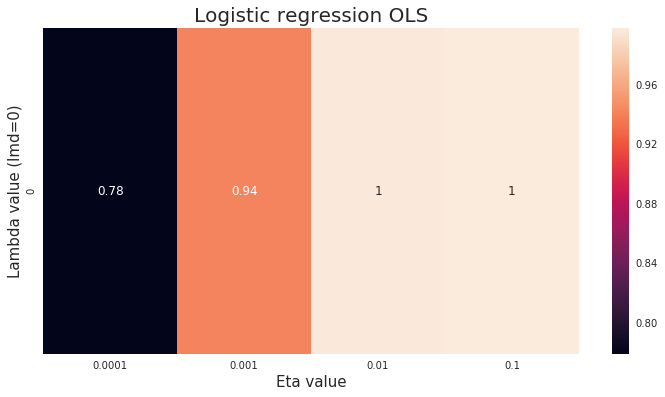

In [32]:
m = np.array(accuracy[key]).reshape(1,(len(eta)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=eta)
ax.set_title("Logistic regression OLS", fontsize = 20)
ax.set_xlabel("Eta value", fontsize = 15)
ax.set_ylabel("Lambda value (lmd=0)", fontsize = 15)
plt.savefig("./results/figures/Logisticregression_OLS.png")

# Ridge

In [ ]:
eta = [0.0001, 0.001, 0.01, 0.1]
lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]

key = "ridge"

for e in eta:
    for l in lmd:
        a = algorithms.LogisticRegression(e, random_state, key, n_iter, l)
        log = a.fit(X_train, y_train)
        score = log.predict(X_test)
        acc = np.sum(score == y_test)/len(score)
        accuracy[key].append(acc)

/home/hanna/project2/Costfunctions.py:61: RuntimeWarning: divide by zero encountered in log
  return -y.dot(np.log(self.p)) - ((1 - y).dot(np.log(1 - self.p))) + l2term


In [ ]:
m = np.array(accuracy[key]).reshape((len(eta), len(lmd)))

plt.figure(figsize=(12,6))
ax = sns.heatmap(m, annot = True, xticklabels=lmd, yticklabels=eta)
ax.set_title("Logistic regression Ridge", fontsize = 20)
ax.set_xlabel("Lambda value", fontsize = 15)
ax.set_ylabel("Eta value", fontsize = 15)
plt.savefig("./results/figures/Logisticregression_Ridge.png")